In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("merged.csv")

pd.set_option('display.max_columns', None)
display(df.head())
df.shape

,datetime,PM10,SO2,CO,NO2,NOX,NO,O3,temp,feelslike,humidity,dew,precip,precipprob,snow,snowdepth,windgust,windspeed,winddir,pressure,visibility,cloudcover,solarradiation,solarenergy,uvindex,conditions,icon
0,2022-01-02 00:00:00,47.976,2.622,633.510,91.5125,123.564,44.600,4.0,10.0,10.0,87.38,8.0,0.0,0.0,0.0,0.0,16.6,9.4,250.0,1020.0,9.0,50.0,0.0,0.0,0.0,Partially cloudy,partly-cloudy-night
1,2022-01-02 01:00:00,50.498,2.786,537.026,90.1475,121.566,43.642,3.6,10.0,10.0,87.38,8.0,0.0,0.0,0.0,0.0,15.5,13.0,260.0,1021.0,10.0,50.0,0.0,0.0,0.0,Partially cloudy,partly-cloudy-night
2,2022-01-02 02:00:00,47.264,3.456,615.502,102.6875,119.832,39.820,3.4,10.0,10.0,87.38,8.0,0.0,0.0,0.0,0.0,15.8,13.0,260.0,1021.0,10.0,50.0,0.0,0.0,0.0,Partially cloudy,partly-cloudy-night
3,2022-01-02 03:00:00,46.026,3.260,693.612,82.3575,120.728,46.062,3.7,10.0,10.0,87.38,8.0,0.0,0.0,0.0,0.0,15.5,5.4,250.0,1021.0,10.0,50.0,0.0,0.0,0.0,Partially cloudy,partly-cloudy-night
4,2022-01-02 04:00:00,47.514,3.252,626.874,54.8325,97.116,41.600,4.0,9.0,9.0,93.45,8.0,0.0,0.0,0.0,0.0,14.4,0.0,0.0,1021.0,10.0,50.0,0.0,0.0,0.0,Partially cloudy,partly-cloudy-night


(29184, 27)

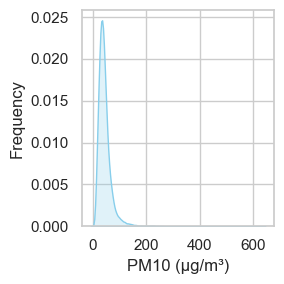

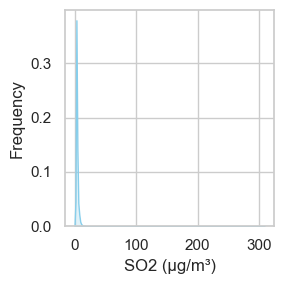

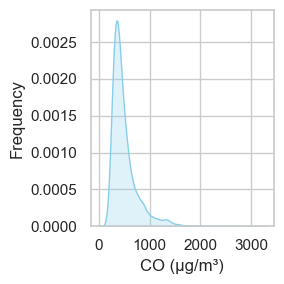

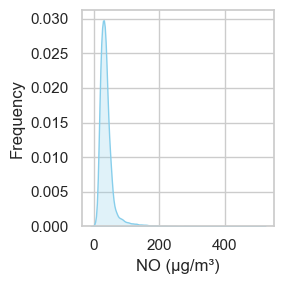

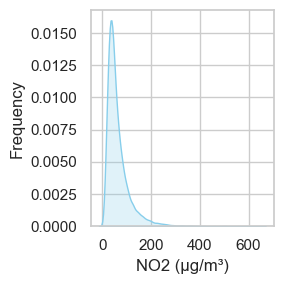

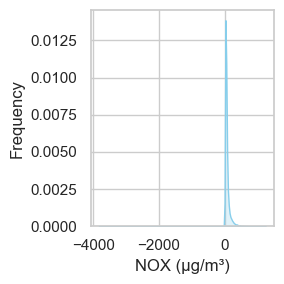

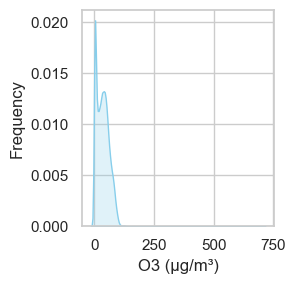

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


pollutants = ['PM10', 'SO2', 'CO', 'NO', 'NO2', 'NOX', 'O3']

sns.set(style="whitegrid")

for pollutant in pollutants:
    plt.figure(figsize=(3, 3))
    sns.kdeplot(df[pollutant], color='skyblue', fill = True)
    plt.xlabel(f'{pollutant} (µg/m³)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])  
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month


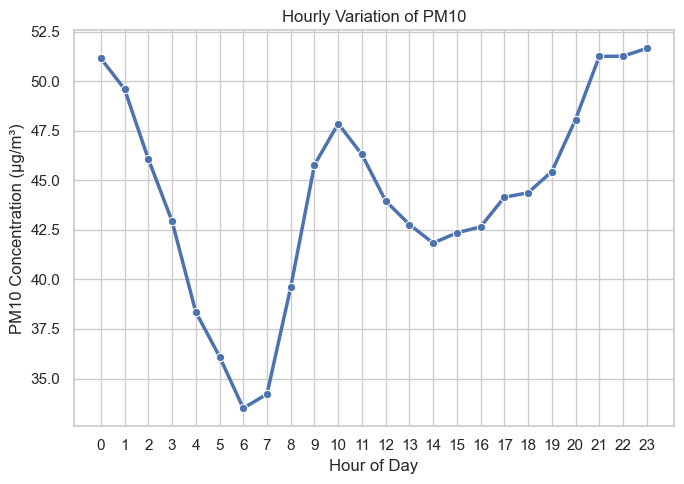

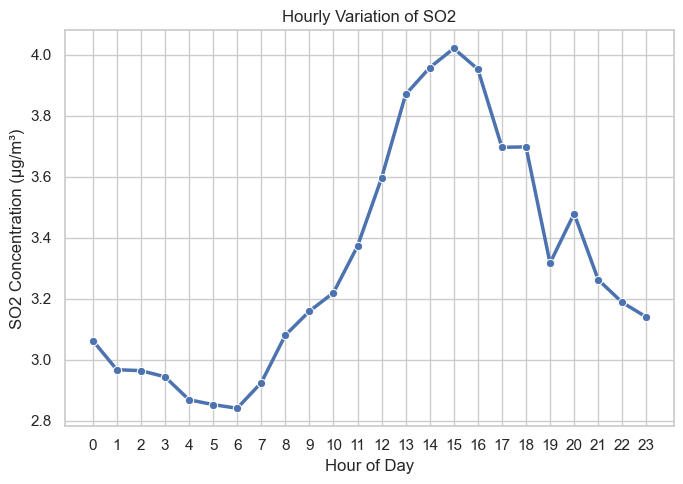

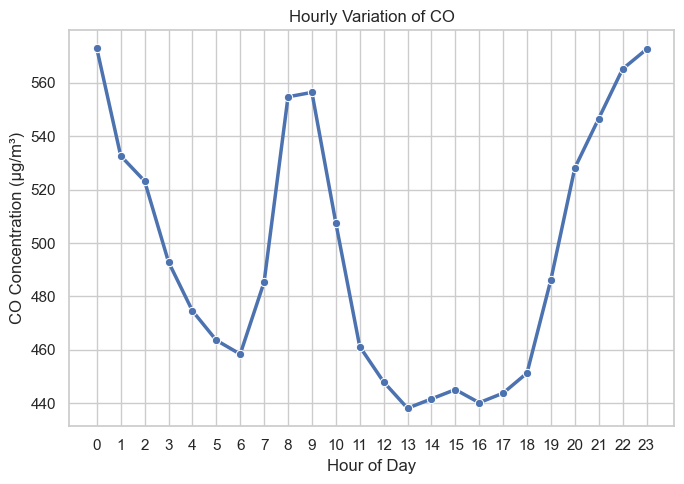

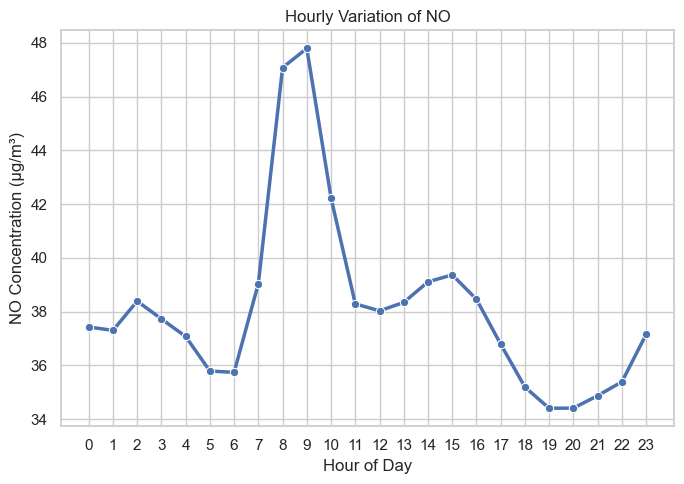

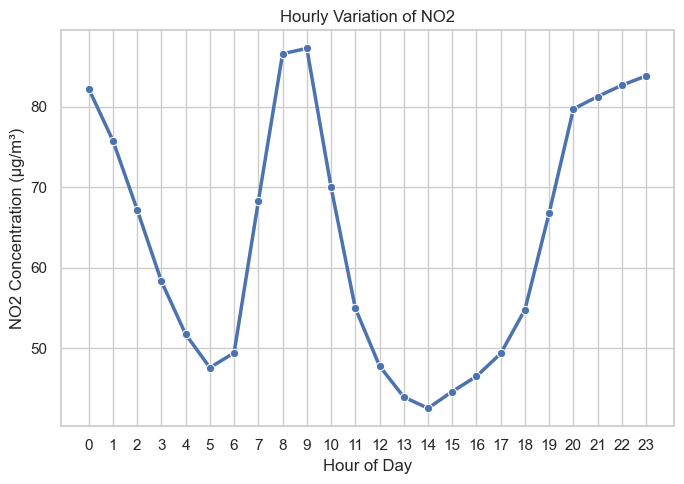

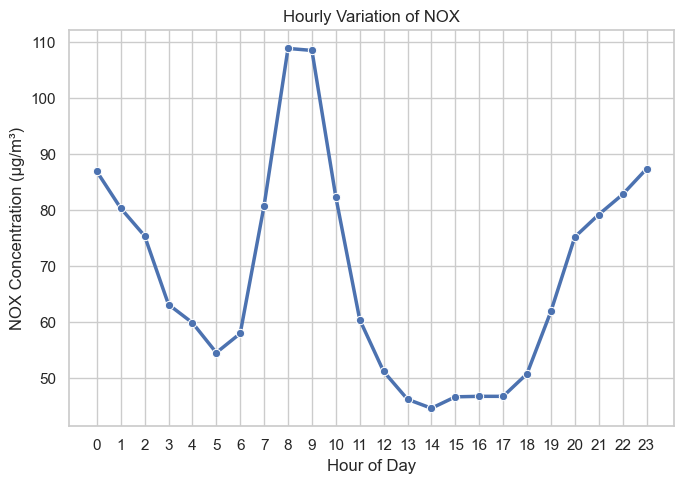

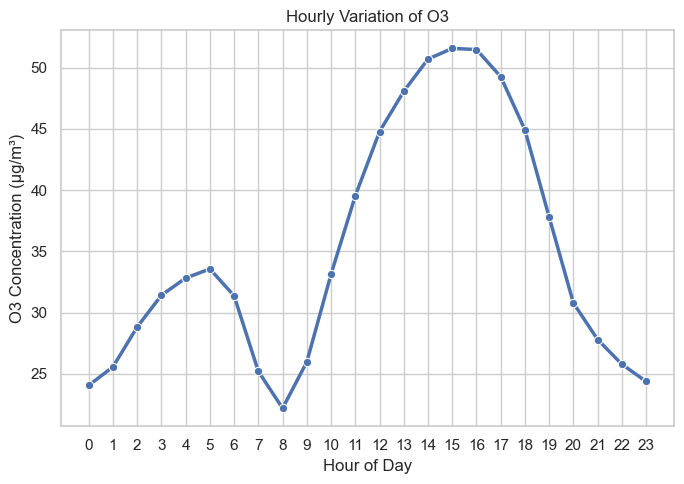

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pollutants = ['PM10', 'SO2', 'CO', 'NO', 'NO2', 'NOX', 'O3']
for pollutant in pollutants:
    hourly_avg = df.groupby('hour')[pollutant].mean()

    plt.figure(figsize=(7, 5))
    sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o', linewidth=2.5)  
    plt.title(f'Hourly Variation of {pollutant}')
    plt.xlabel('Hour of Day')
    plt.ylabel(f'{pollutant} Concentration (µg/m³)')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


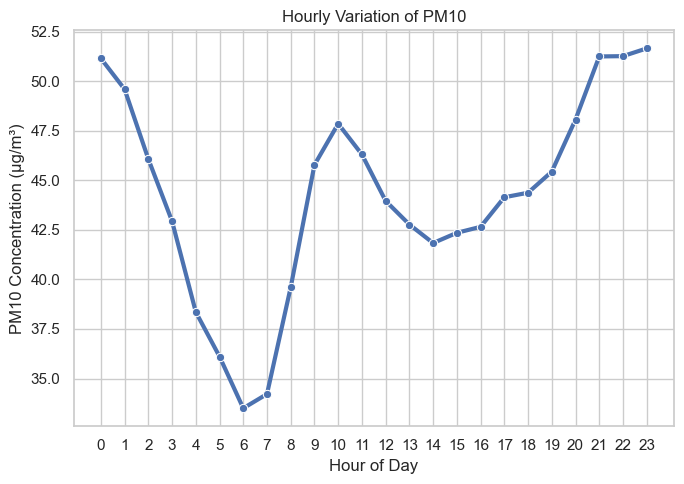

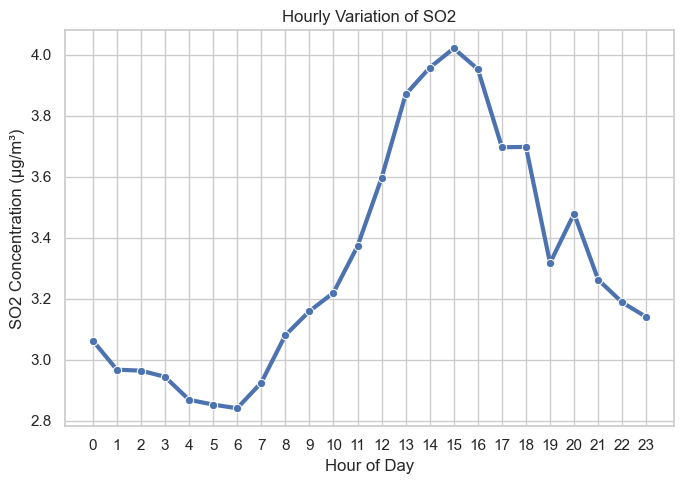

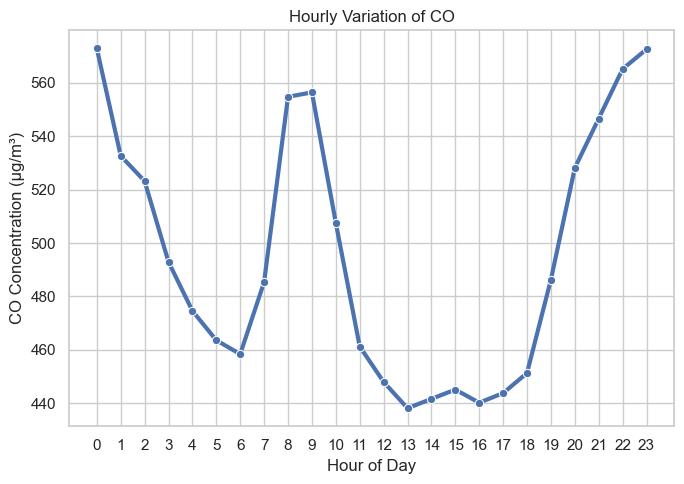

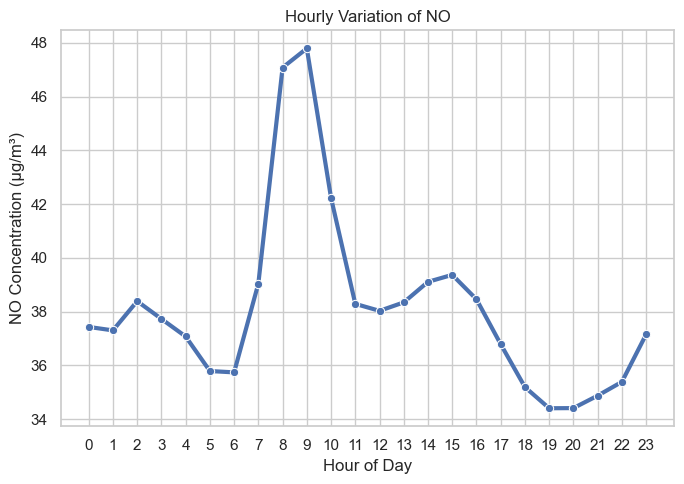

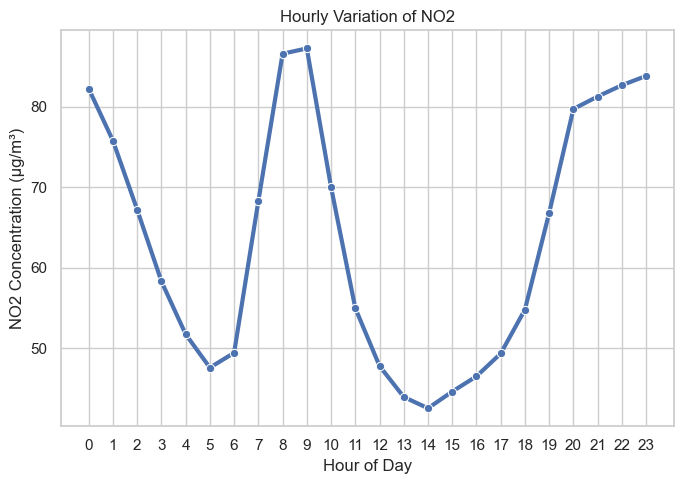

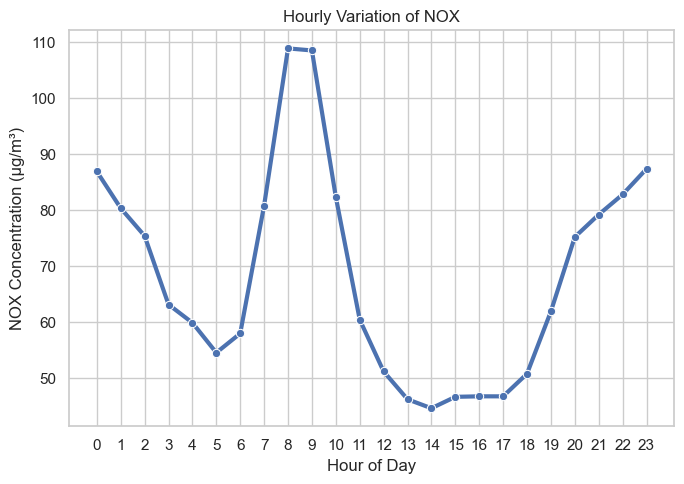

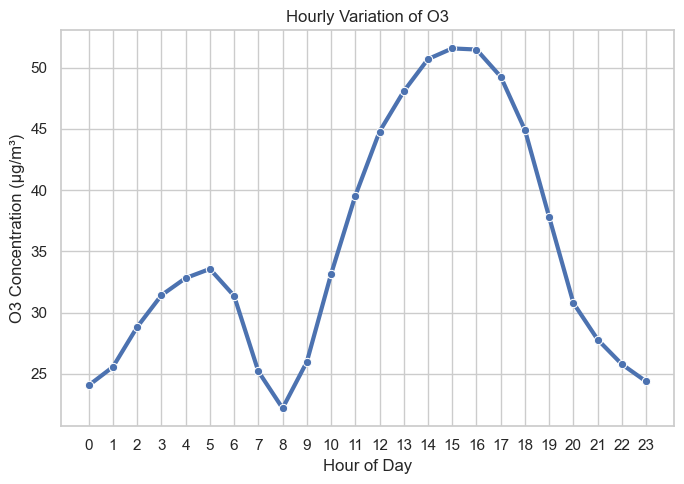

In [ ]:
pollutants = ['PM10', 'SO2', 'CO', 'NO', 'NO2', 'NOX', 'O3']
for pollutant in pollutants:
   
    hourly_avg = df.groupby('hour')[pollutant].mean()

    plt.figure(figsize=(7, 5))
    sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o', linewidth = 3)
    plt.title(f'Hourly Variation of {pollutant}')
    plt.xlabel('Hour of Day')
    plt.ylabel(f'{pollutant} Concentration (µg/m³)')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

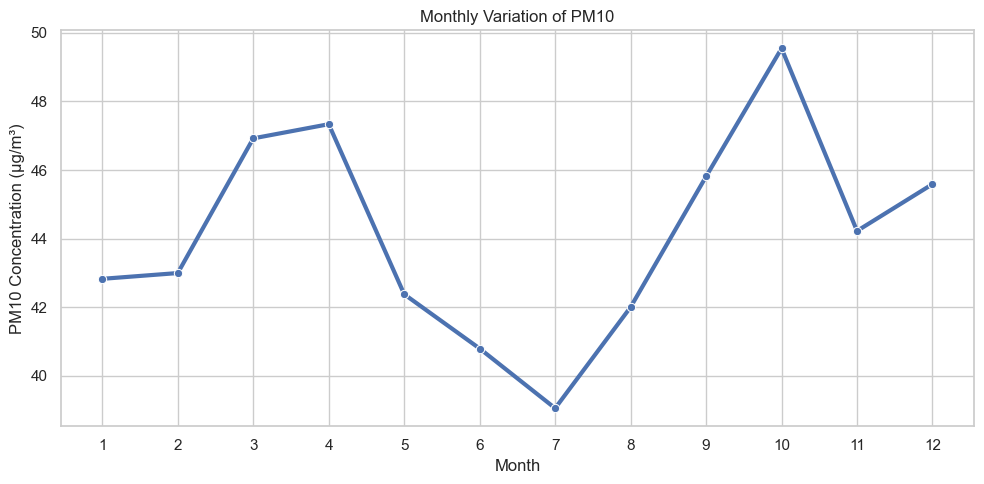

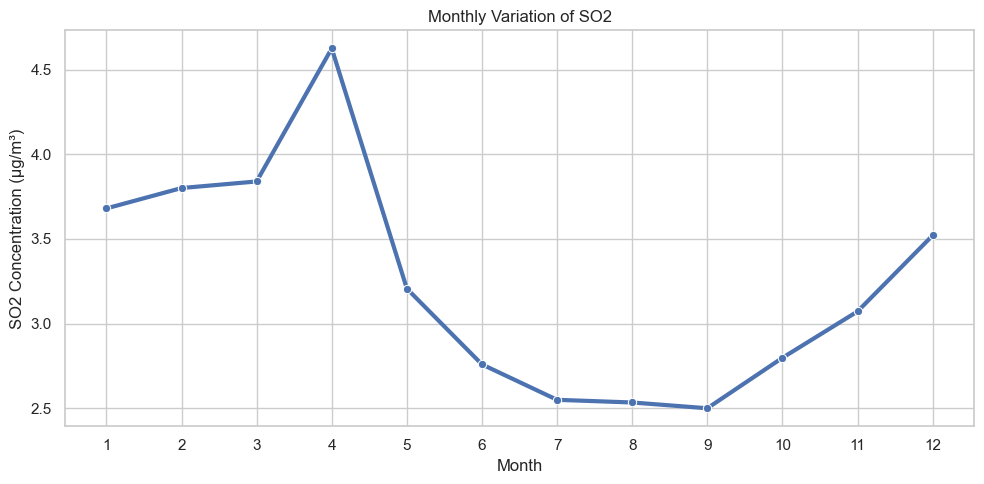

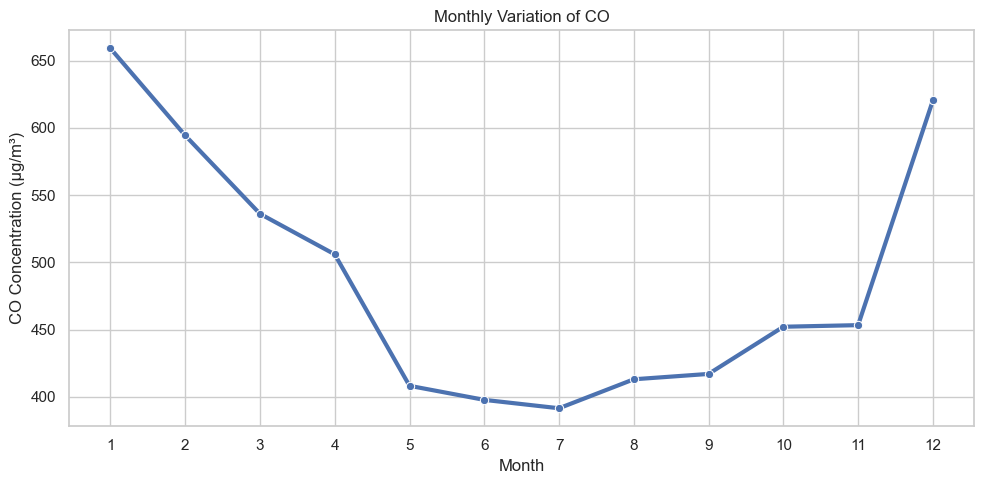

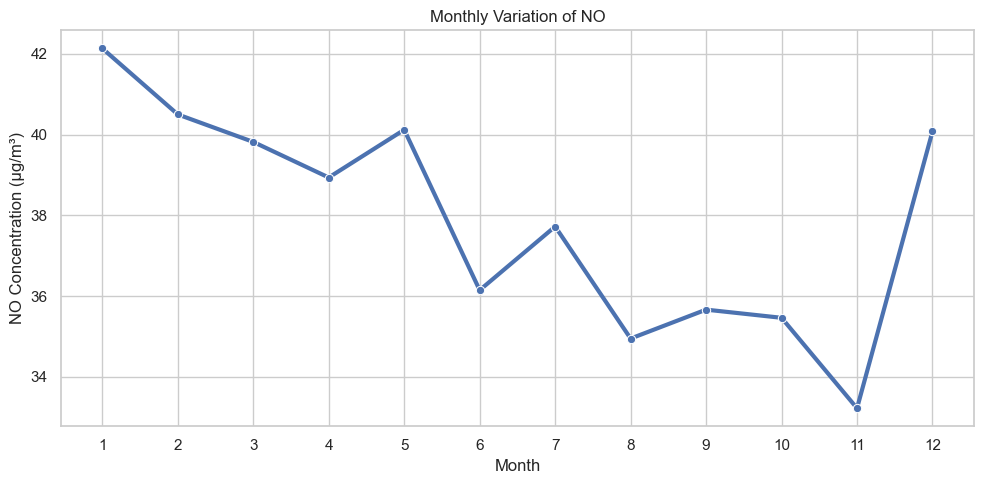

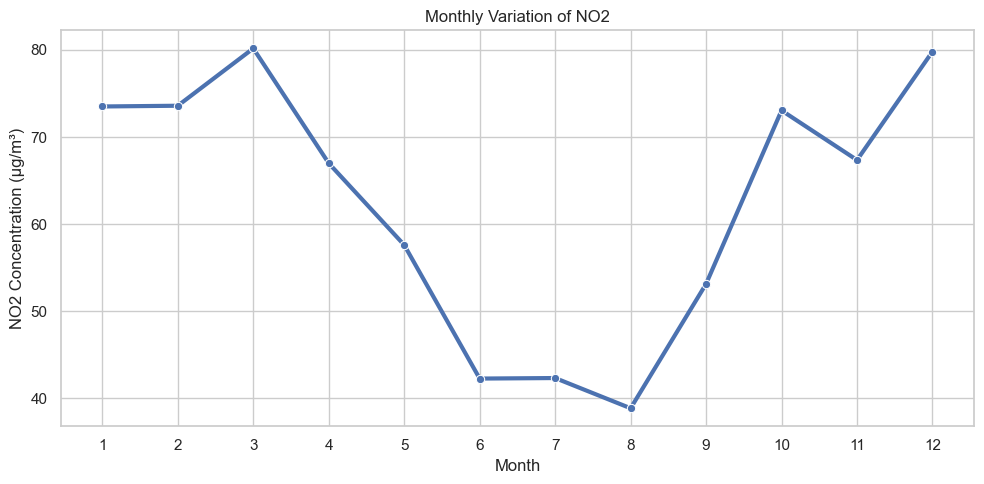

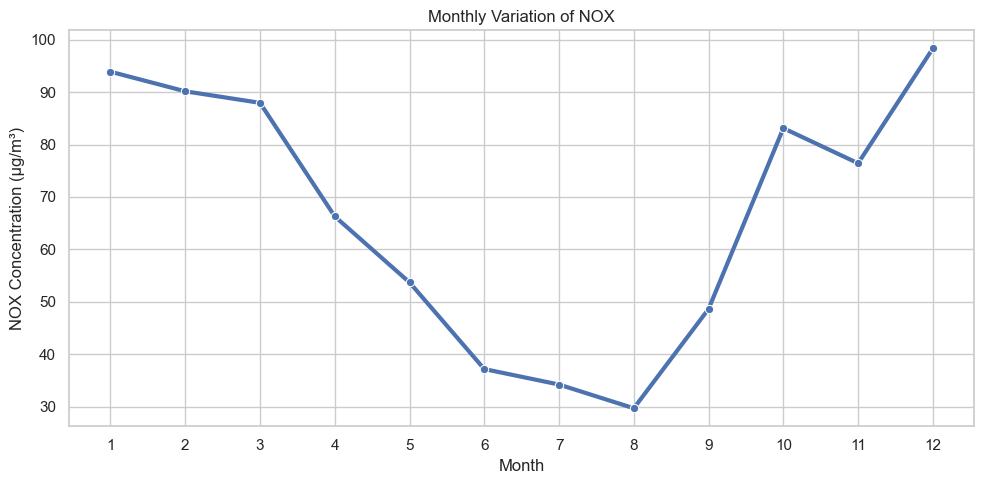

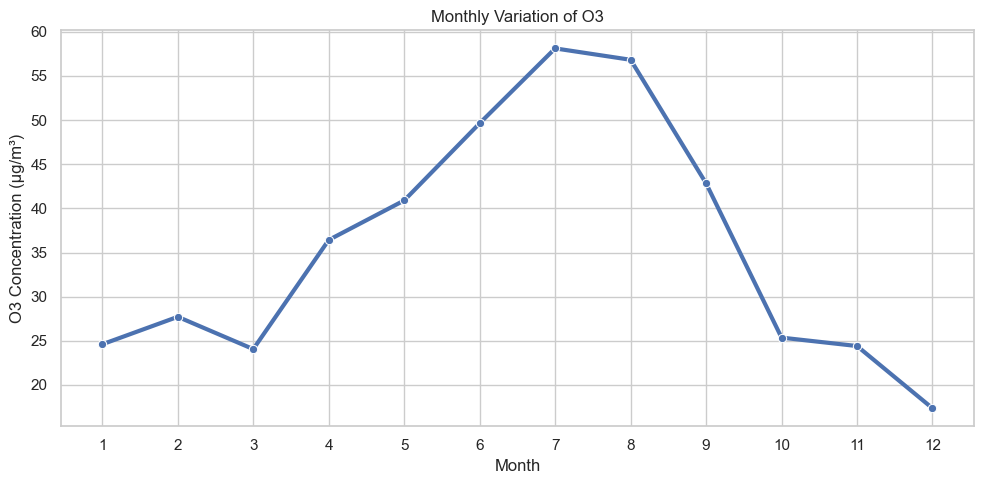

In [6]:
pollutants = ['PM10', 'SO2', 'CO', 'NO', 'NO2', 'NOX', 'O3']
for pollutant in pollutants:
    
    monthly_avg = df.groupby('month')[pollutant].mean()

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', linewidth = 3)
    plt.title(f'Monthly Variation of {pollutant}')
    plt.xlabel('Month')
    plt.ylabel(f'{pollutant} Concentration (µg/m³)')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

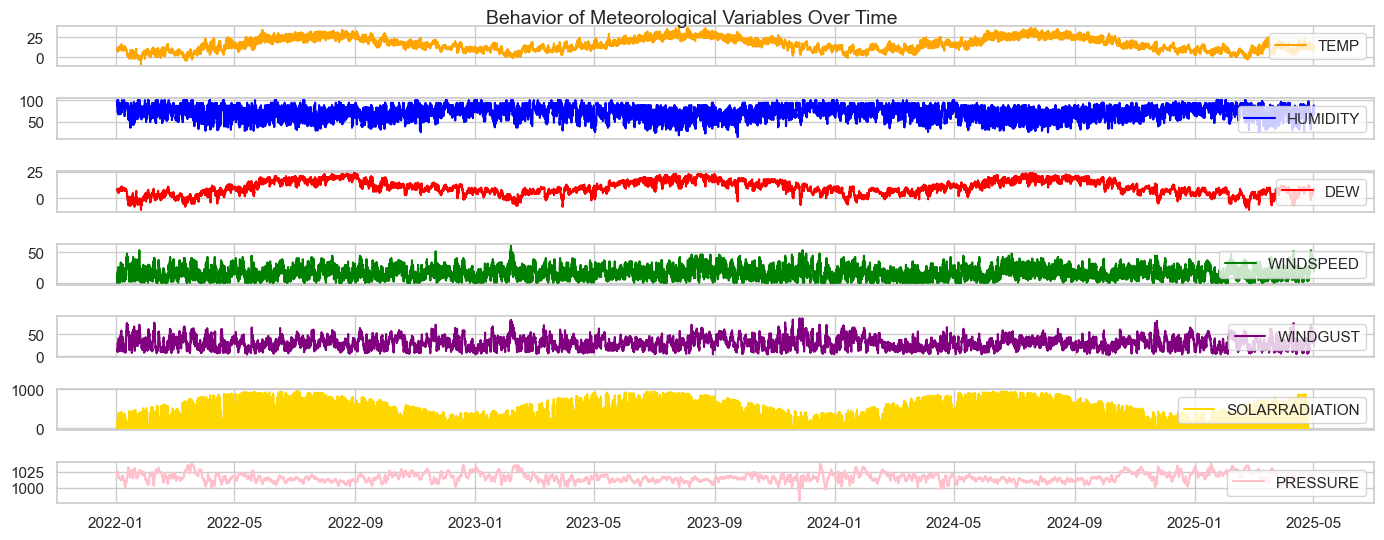

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df['datetime'] = pd.to_datetime(df['datetime'])


features = ['temp', 'humidity','dew', 'windspeed', 'windgust', 'solarradiation','pressure']

fig, axs = plt.subplots(len(features), 1, figsize=(14, 5.5), sharex=True)

colors = ['orange', 'blue','red', 'green', 'purple', 'gold','pink']

for i, feature in enumerate(features):
    axs[i].plot(df['datetime'], df[feature], color=colors[i], label=feature.upper())
    axs[i].legend(loc='upper right')
    axs[i].grid(True)

plt.suptitle("Behavior of Meteorological Variables Over Time", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.95) 
plt.show()
